In [80]:
%matplotlib inline
from pathlib import Path
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [81]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [83]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [85]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent_date

('2017-08-23',)

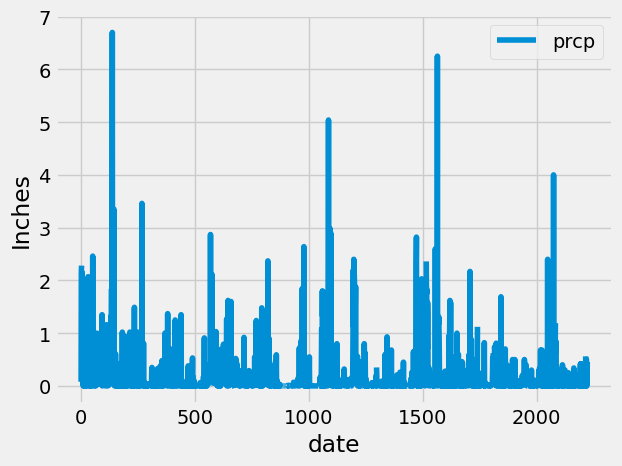

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
one_year_from_lastdate = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurements.date, Measurements.prcp).order_by(Measurements.date.asc()).filter(Measurements.date > one_year_from_lastdate).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_scores)

# Sort the dataframe by date
df.sort_values(by=["date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(xlabel ="date", ylabel='Inches')
plt.show()

In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [91]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Stations.id).count()
total_stations

9

In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurements.station,func.count(Measurements.station)).\
                    group_by(Measurements.station).\
                    order_by(func.count(Measurements.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = [Measurements.tobs,
       func.min(Measurements.tobs),
       func.max(Measurements.tobs),
       func.avg(Measurements.tobs)]

temp_data_active_station = session.query(*temp).\
filter(Measurements.station == 'USC00519281').all()
temp_data_active_station

[(85.0, 54.0, 85.0, 71.66378066378067)]

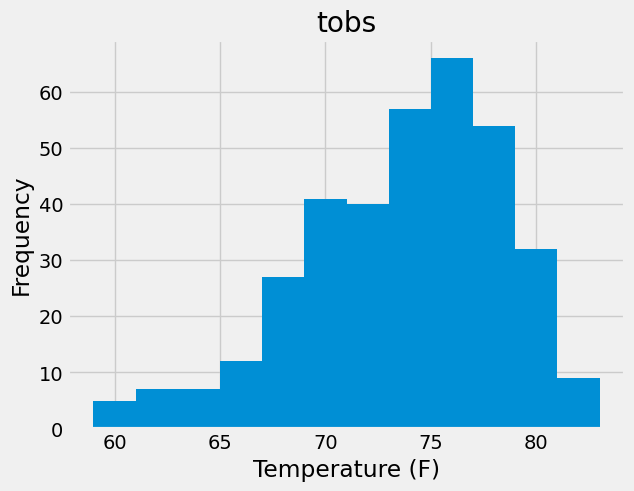

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(Measurements.date,Measurements.tobs).\
    filter(Measurements.station == 'USC00519281').\
    order_by(Measurements.date.desc()).first()

twelve_month_values = session.query(Measurements.date,Measurements.tobs).\
    filter(Measurements.station == 'USC00519281').\
    filter(Measurements.date > '2016-08-17').all()

df_data_12_months= pd.DataFrame(twelve_month_values)

hist = df_data_12_months.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [95]:
# Close Session
session.close()